In [1]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [2]:
!pip freeze > kaggle_image_requirements.txt

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [4]:
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm

In [5]:
# Params for bert model and tokenization
Nsamp = 1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token

In [6]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        try:
            tokens = row.split(" ")[:maxtokens]
        except:
            tokens=""
    return tokens

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-4889ac943b93>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if row is None or row is '':


In [7]:
def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', "", token)
            token = token[:maxtokenlen] # truncate token
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [8]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords) # see default stopwords

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
bodies_df = pd.read_csv('./bodies.csv')

In [10]:
fraud_bodies_df = pd.read_csv('./fraud_bodies_df.csv')

In [11]:
import random

# Convert everything to lower-case, truncate to maxtokens and truncate each token to maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [12]:
print("Shape of combined data represented as numpy array is:")
print(raw_data.shape)
print("Data represented as numpy array is:")
print(raw_data)

# corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

Shape of combined data represented as numpy array is:
(2000,)
Data represented as numpy array is:
[list(['attena', 'sircit', 'obvious', 'proposal', 'come', 'asuprisee', 'thisis', 'met', 'i', 'inspired', 'tosending', 'youthis', 'email', 'huge', 'fund', 'transfer', 'opportunity', 'thatwill', 'mutual', 'benefit', 'two', 'usehoweverc', 'i', 'barrister', 'maxwell', 'obiekwucthe', 'personalattorney', 'late', 'engre', 'suk', 'hun', 'wufeic', 'citizen', 'japanc', 'used', 'to', 'work', 'withnigerian', 'national', 'petrolum', 'cooperatrion', 'nnpce', 'on', 'th', 'august', 'c', 'clientchis', 'wife', 'andtheir', 'threewere', 'involved', 'fatal', 'house', 'explossion', 'atnigerian', 'national', 'petrolum', 'cooperatrion', 'nnpcquaters', 'lagoseunfortunately', 'lost', 'lives', 'includingother', 'people', 'premisesesince', 'i', 'made', 'several', 'enquiries', 'severalembassies', 'locate', 'clients', 'extendedrelativesc', 'also', 'proved', 'successfule', 'after', 'several', 'unsuccessful', 'attemptsc'

In [79]:
header

array([1, 0, 1, ..., 1, 1, 1])

In [13]:
# function for shuffling data in unison with labels/header
def unison_shuffle(a, b):
    p = np.random.permutation(len(b))
    data = a[p]
    header = np.asarray(b)[p]
    return data, header

# function for converting data into the right format, due to the difference in required format from sklearn models
# we expect a single string per email here, versus a list of tokens for the sklearn models previously explored
def convert_data(raw_data,header):
    converted_data, labels = [], []
    for i in range(raw_data.shape[0]):
        out = ' '.join(raw_data[i])
        converted_data.append(out)
        labels.append(header[i])
        #print(i)
    converted_data = np.array(converted_data, dtype=object)[:, np.newaxis]

    return converted_data, np.array(labels)

raw_data, header = unison_shuffle(raw_data, header)

# split into independent 70% training and 30% testing sets
#idx = int(0.6*raw_data.shape[0])
# 70% of data for training
#train_x, train_y = convert_data(raw_data[:idx],header[:idx])
# remaining 30% for testing
#valid_x, valid_y = convert_data(raw_data[idx:],header[idx:])

total_size = raw_data.shape[0]

# Calculate indices
idx_train = int(0.6 * total_size)  # end of training set
idx_val = int(0.8 * total_size)  # end of validation set

# Split the data
train_x, train_y = convert_data(raw_data[:idx_train], header[:idx_train])
val_x, val_y = convert_data(raw_data[idx_train:idx_val], header[idx_train:idx_val])
test_x, test_y = convert_data(raw_data[idx_val:], header[idx_val:])

print("train_x/train_y list details, to make sure it is of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(train_y.shape)

train_x/train_y list details, to make sure it is of the right form:
1200
[['emailmessagemessage object xde']
 [' forwarded darron c gironhouect   am from veronica espinozaenronenronxgate   amto janie aguayohouectect diane andersonnaenronenron derek baileycorpenronenron david baumbachhouectect jean bellhouectect patricia boulangercalectect bob bowenhouectect debbie r bracketthouectect william s bradfordenronenronxgate lesli campbellenronenronxgate celeste cisnerosnaenronenron sharon crawfordcalectect richard demingnaenronenron russell diamondenronenronxgate cindy feldmancalectect darron c gironhouectect veronica gonzalezenronenronxgate jeffrey c gossetthouectect walter guidrozenronenronxgate larry joe hunterhouectect kam keiserhouectect phillip m lovehouectect errol mclaughlincorpenronenron nidia mendozaenronenronxgate kevin meredithcorpenronenron tom moranenronenronxgate leslie reeveshouectect tanya rohauerenronenronxgate dianne seibcalectect linda sietzemacalectect kim s theriothouect

In [14]:
# Function to build overall model
def build_model(max_seq_length):
    # tf hub bert model path
    bert_path = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)


    preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    encoder_inputs = preprocessor(text_input)
    encoder = hub.KerasLayer(bert_path,trainable=False)
    outputs = encoder(encoder_inputs)
    pooled_output = outputs["pooled_output"]      # [batch_size, 768].
    sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].# just extract BERT features

    # train dense classification layer on top of extracted pooled output features
    dense = tf.keras.layers.Dense(256, activation="relu")(pooled_output)
    pred = tf.keras.layers.Dense(1, activation="sigmoid")(dense)

    model = tf.keras.Model(inputs=text_input, outputs=pred)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    return model

In [15]:
# Build model
model = build_model(maxtokens)

# Instantiate variables
#initialize_vars(sess)

# Train model
history = model.fit(train_x,train_y,validation_data=(val_x,val_y),epochs=5,batch_size=32)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

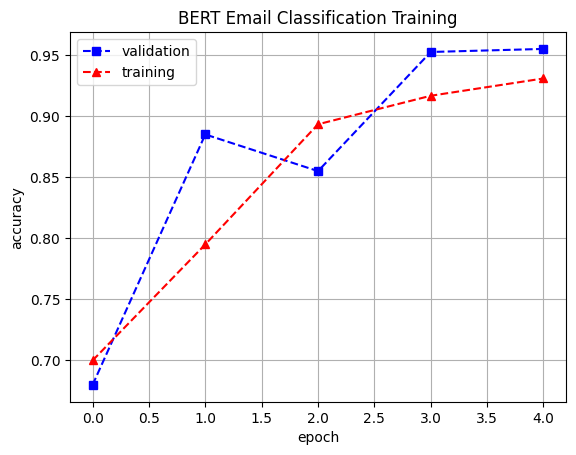

In [16]:
import matplotlib.pyplot as plt

df_history = pd.DataFrame(history.history)
fig,ax = plt.subplots()
plt.plot(range(df_history.shape[0]),df_history['val_accuracy'],'bs--',label='validation')
plt.plot(range(df_history.shape[0]),df_history['accuracy'],'r^--',label='training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('BERT Email Classification Training')
plt.legend(loc='best')
plt.grid()
plt.show()

fig.savefig('BERTConvergence.eps', format='eps')
fig.savefig('BERTConvergence.pdf', format='pdf')
fig.savefig('BERTConvergence.png', format='png')
fig.savefig('BERTConvergence.svg', format='svg')

In [17]:
predict = model.predict(test_x)

13/13 [==============================] - 202s 15s/step


In [26]:
y_predict =  np.where(predict > 0.5, 1, 0)

In [30]:
y_predict.shape

(400, 1)

In [32]:
# Using reshape
y_predict = y_predict.reshape(-1)

In [31]:
test_y.shape

(400,)

In [33]:
from sklearn.metrics import classification_report

In [96]:
report = classification_report(test_y, y_predict, target_names=["not phishing", "phishing"])

In [97]:
print(report)

              precision    recall  f1-score   support

not phishing       0.98      0.96      0.97       191
    phishing       0.96      0.99      0.97       209

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# 125 datasets

In [38]:
test_new = test_x.reshape(-1)


In [41]:
type(test_new)

numpy.ndarray

In [43]:
test_new[1]

'from the desk of adama ibrahimbill and exchange managerafrican development bankouagadougou burkina fasotelephone number     dear friendi crave indulgence unsolicited nature letter was borne desperation current development please bear me my name mradama ibrahim auditor african development bank i discovered existing dormant account  yearswhen i discovered continuation withdrawals this account long period banking law stipulates un serviceable account  years go bank revenue an unclaimed fundi made personal inquiries depositor next kin sadly depositor next kin died motor acident rest family died iraq crisisi made investigation double sure fact since i unsuccessful inlocating relativesi seek consent present next kin deceased as auditor bank i use position bank help becoming next kin'

In [46]:
test_new_df = pd.DataFrame(test_new)

In [51]:
test_new_df

,text
0,hi johni able find number i wanted discuss con...
1,from the desk of adama ibrahimbill and exchang...
2,when thursday december pm pm gmt centraltim...
3,spouses invited
4,here draft jeff dasovichs testimony please for...
...,...
395,of course i knew that the question is calling ...
396,dear associatei wish use medium reach the time...
397,dear friendthis letter must come big surprise ...
398,emailmessagemessage object xde


In [50]:
test_new_df = pd.DataFrame(test_new, columns=['text'])


In [53]:
test_y.shape

(400,)

In [54]:
test_new_df['target'] = test_y


In [55]:
test_new_df

,text,target
0,hi johni able find number i wanted discuss con...,0
1,from the desk of adama ibrahimbill and exchang...,1
2,when thursday december pm pm gmt centraltim...,0
3,spouses invited,0
4,here draft jeff dasovichs testimony please for...,0
...,...,...
395,of course i knew that the question is calling ...,0
396,dear associatei wish use medium reach the time...,1
397,dear friendthis letter must come big surprise ...,1
398,emailmessagemessage object xde,1


In [56]:
test_dataset_raw_0 = test_new_df[test_new_df['target']==0]

In [57]:
test_dataset_raw_0.shape

(191, 2)

In [80]:
random_25_rows = test_dataset_raw_0.sample(n=100)

# Build the new DataFrame using the randomly selected rows
test_dataset_raw_0_25 = pd.DataFrame(random_25_rows)

In [81]:
test_dataset_raw_0_25.head()

,text,target
69,w e e k e n d s y s t e m s a v a i l a b i l ...,0
117,forwarded tana joneshouect pm janelle scheu...,0
110,john reviewing i would hold realistic prospect...,0
210,image image image image image image image ima...,0
166,johni made changes suggested the prior version...,0


In [167]:
test_dataset_raw_0_25.index

Int64Index([ 69, 117, 110, 210, 166,  79, 369, 224, 292, 289, 310, 125, 365,
            358, 388, 377, 391, 279,  30, 143, 395, 103, 244,   5,  78, 201,
            231,  91, 371, 138,  88, 251, 385, 205,  87,  62,   2, 338, 185,
            328, 260, 342,  50, 311, 236, 119, 217,  77, 180, 222, 218, 169,
             56, 359, 158, 329, 250,  39, 257,   4,  34, 382,  29,  14, 305,
            123, 323, 160, 347,  97, 174, 216, 285, 195, 297, 341, 321, 241,
            376, 126, 322, 115,  73, 233, 122, 127, 212, 104,  51, 106, 375,
            296, 116, 146, 208, 184, 394, 121, 227, 318],
           dtype='int64')

In [173]:
test_dataset_raw_0_25['text'][369]

'this could become deep pit i want distract theprimary mission may solution gets needand pull away north american effort  coulddeputize jane wilson help this jane usual embeddedherself deeply enron india organization vp govt affairs canbe sound source information well agent inindia think contacting getting helpalso never explicitly talked whether focus northamerican world wide my view worldwide beheavily modified fact enron employees current probablyfuture here us many deficiencies education systemgraduate education best world need show rapidearly success and thats best accomplished sticking close home atleast initiallychristie patrickect  pm to steven j keannaenronenron mark palmercorpenronenron cc subject re enron university affairsmark steveid happy get us involved this im sure werehandling nonnorth american university'

In [60]:
test_dataset_raw_1 = test_new_df[test_new_df['target']==1]

In [82]:
random_1_rows = test_dataset_raw_1.sample(n=25)

# Build the new DataFrame using the randomly selected rows
test_dataset_raw_1_100 = pd.DataFrame(random_1_rows)

In [83]:
test_dataset_raw_1_100.shape

(25, 2)

In [84]:
merged_df = pd.concat([test_dataset_raw_0_25, test_dataset_raw_1_100], ignore_index=True)

# Shuffle the index
test_125_df = merged_df.sample(frac=1).reset_index(drop=True)

In [163]:
test_125_df.head()

,text,target
0,all attached repo see par margin maintenance...,0
1,bookouts bookouts bookouts bookouts,0
2,hi just let know planning go conroe sunday hou...,0
3,when thursday december pm pm gmt centraltim...,0
4,original messagefrom weidong tian wdtian_yaho...,0


In [85]:
predict_125 = model.predict(test_125_df['text'])

4/4 [==============================] - 65s 16s/step


In [86]:
y_predict_125 =  np.where(predict_125 > 0.5, 1, 0)
y_predict_125 = y_predict_125.reshape(-1)

In [87]:
y_true_125 = test_125_df['target'].to_numpy()


In [92]:

report_125 = classification_report(y_true_125, y_predict_125, target_names=["not phishing", "phishing"])


In [93]:
print(report_125)

              precision    recall  f1-score   support

not phishing       1.00      0.93      0.96       100
    phishing       0.78      1.00      0.88        25

    accuracy                           0.94       125
   macro avg       0.89      0.97      0.92       125
weighted avg       0.96      0.94      0.95       125



# chatgpt 4

In [99]:
test_dataset_raw_1_100.index

Int64Index([295, 170,  54, 155, 344,  25,  42,  63, 325, 330, 194,  59, 114,
            381, 363, 197, 336, 173, 140, 148, 153, 399, 270, 187, 196],
           dtype='int64')

In [100]:
test_dataset_raw_gpt4 = test_dataset_raw_1_100

In [149]:
test_dataset_raw_gpt4['text'][196]

'dear sirmadamdo accept sincere apologies mail meet personal ethicsi introduce staff accounts management section ofa wellknown bank united kingdom one accounts holding balance afifteen millionbritish pounds dormant operated past years from investigations confirmations owner account foreignerby name austin martins died august  since nobody doneanything as regards claiming money familymembers aware existence neither account fundsalso information from national immigration states also singleon entry uki secretly discussed matter bank officials andwe agreed find reliable foreign partner deal with we thuspropose business you standing next kin thesefunds deceased funds released due processes havebeen followed this transaction totally free risk troubles fund legitimateand originate drug money laundry terrorism otherillegal'

In [103]:
test_dataset_raw_gpt4['text'][295] = "Hi, I'm Bhamini Lele from Centrafest Technologies Pvt. Ltd. in Mumbai, India, reaching out in my role within Customer Reach and Support. We're thrilled to present our latest product, the Business Card Reader Cum Photo Scanner, Model Plus. This device offers a host of features including dual-sided scanning, memo writing, label printing, customized categories, online category setting, reminder system, import/export to third-party packages, and the capacity to scan different sizes of business cards, maintaining their colour and detail. This product has been designed considering feedback from our key corporate clients, ensuring it meets diverse document handling needs. Our records indicate that you, along with Ms. Sneha and Ms. Shefali, have shown interest in such a device. If you have already purchased and are content with a scanner from us, please disregard this message. I look forward to your response and stand ready to answer any questions or provide further information. Best, Bhamini Lele, Centrafest Technologies Pvt. Ltd."

<ipython-input-103-2852b88e4293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][295] = "Hi, I'm Bhamini Lele from Centrafest Technologies Pvt. Ltd. in Mumbai, India, reaching out in my role within Customer Reach and Support. We're thrilled to present our latest product, the Business Card Reader Cum Photo Scanner, Model Plus. This device offers a host of features including dual-sided scanning, memo writing, label printing, customized categories, online category setting, reminder system, import/export to third-party packages, and the capacity to scan different sizes of business cards, maintaining their colour and detail. This product has been designed considering feedback from our key corporate clients, ensuring it meets diverse document handling needs. Our records indicat

In [106]:
test_dataset_raw_gpt4['text'][170] = "Attention, I am Mr. Moni Millat, a member of the Independent Committee of Eminent Persons (ICEP) in Switzerland. The ICEP is tasked with identifying dormant bank accounts in Switzerland, originally owned by non-Swiss citizens, that have been inactive since World War II. Intriguingly, in July, the Swiss Bankers Association disclosed a list of such accounts, a majority of which belonged to victims of the Holocaust. The relentless efforts of the ICEP have led to the identification of additional dormant accounts as of December. These accounts range from interest-bearing savings accounts, securities accounts, safe deposit boxes, custody accounts, non-interest-bearing transaction accounts, to numbered accounts. Accounts that are interest-bearing have been accumulating interest since their inception. Claims on these accounts by non-Swiss citizens are managed by the Claims Resolution Tribunal (CRT). Recently, a dormant account named 'Ordner Adele' was discovered, holding a credit balance of US dollars along with accumulated interest. Unfortunately, the intended recipient was a victim of the Holocaust era, leaving no will."

<ipython-input-106-32d7a5100fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][170] = "Attention, I am Mr. Moni Millat, a member of the Independent Committee of Eminent Persons (ICEP) in Switzerland. The ICEP is tasked with identifying dormant bank accounts in Switzerland, originally owned by non-Swiss citizens, that have been inactive since World War II. Intriguingly, in July, the Swiss Bankers Association disclosed a list of such accounts, a majority of which belonged to victims of the Holocaust. The relentless efforts of the ICEP have led to the identification of additional dormant accounts as of December. These accounts range from interest-bearing savings accounts, securities accounts, safe deposit boxes, custody accounts, non-interest-bearing transaction accounts, 

In [108]:
test_dataset_raw_gpt4['text'][54] = "Good day,I'm John Williams, an auditor and computing staff member at a bank here in England. I am reaching out because of an urgent matter concerning an inactive account opened in 2000. No activity has been recorded since 2003, and without immediate action, the substantial funds within will be forfeit. The account holder was Mr. Maxwell Brown, a foreigner and manager of a petrol chemical service in England. A chemical engineer by profession, Mr. Brown passed away in 2003, and since then, no claims have been made on his account, which holds £18,000,000. My investigation confirms that his company is unaware of this account. To prevent these funds from being lost, I am seeking a trustworthy individual to assist in the transfer of this significant amount to a secure foreign account."

<ipython-input-108-52f4a5d19364>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][54] = "Good day,I'm John Williams, an auditor and computing staff member at a bank here in England. I am reaching out because of an urgent matter concerning an inactive account opened in 2000. No activity has been recorded since 2003, and without immediate action, the substantial funds within will be forfeit. The account holder was Mr. Maxwell Brown, a foreigner and manager of a petrol chemical service in England. A chemical engineer by profession, Mr. Brown passed away in 2003, and since then, no claims have been made on his account, which holds £18,000,000. My investigation confirms that his company is unaware of this account. To prevent these funds from being lost, I am seeking a trustwort

In [110]:
test_dataset_raw_gpt4['text'][155] ="Greetings, In the name of the Almighty, I, Engapet Kayce from New Sweden, write to you with sincere intentions. Previously, I was associated with Shell Petroleum in Iraq and was a major offshore oil rig investor, but recent health challenges have significantly altered my circumstances. I've been affected by a stroke that has left half of my body paralyzed, and extensive eye surgery has resulted in poor vision. Despite seeking spiritual and medical remedies over the last three years, my situation remains dire, with my doctor predicting permanent immobilization. Regrettably, I lack close relatives to support me during this challenging time; my only known kin, a distant cousin named Mrs. Linda Lefler, emigrated to Australia ten years ago, and I have lost contact with her. Having surrendered my life to God's will, I am inspired to perform a good deed before my time comes, which is why I am reaching out to you today."

<ipython-input-110-f00e481a22c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][155] ="Greetings, In the name of the Almighty, I, Engapet Kayce from New Sweden, write to you with sincere intentions. Previously, I was associated with Shell Petroleum in Iraq and was a major offshore oil rig investor, but recent health challenges have significantly altered my circumstances. I've been affected by a stroke that has left half of my body paralyzed, and extensive eye surgery has resulted in poor vision. Despite seeking spiritual and medical remedies over the last three years, my situation remains dire, with my doctor predicting permanent immobilization. Regrettably, I lack close relatives to support me during this challenging time; my only known kin, a distant cousin named Mrs. 

In [112]:
test_dataset_raw_gpt4['text'][344] ="Subject: Investment Relationship Request from Tabel D. Michael Hello, I'm Tabel Djedje Michael, a 20-year-old, and the younger brother of Maria Michael, who is 24 years old. We are the children of the late Dr. and Mrs. Djedje Michael, our father being a former Minister of the Interior in Ivory Coast, a respected merchant, politician, and a figure of repute in Abidjan, the economic capital of the Ivory Coast. Unfortunately, our father fell victim to political unrest in our country and was assassinated on September 20th, amidst the violence. We were at church when our house was set ablaze by malevolent government agents. Our mother passed away 10 years earlier, and since then, our father took special care of us and never remarried. We currently live with our 90-year-old grandmother. Our father's friend, Mrs. Lim S. Tsing, who works at an information center in Japan, recommended reaching out to a group of contacts for assistance, and from those, we chose you for a business relationship. The purpose of this message is to discuss a potential investment opportunity."

<ipython-input-112-042e262e0471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][344] ="Subject: Investment Relationship Request from Tabel D. Michael Hello, I'm Tabel Djedje Michael, a 20-year-old, and the younger brother of Maria Michael, who is 24 years old. We are the children of the late Dr. and Mrs. Djedje Michael, our father being a former Minister of the Interior in Ivory Coast, a respected merchant, politician, and a figure of repute in Abidjan, the economic capital of the Ivory Coast. Unfortunately, our father fell victim to political unrest in our country and was assassinated on September 20th, amidst the violence. We were at church when our house was set ablaze by malevolent government agents. Our mother passed away 10 years earlier, and since then, our father

In [114]:
test_dataset_raw_gpt4['text'][25] ="Subject: Investment and Resettlement Request from Mrs. Hassane Dear Managing Director, Allow me to introduce myself - I am Mrs. Amina Hassane, an Iraqi refugee. My late husband was a personal aide to the former Iraqi president, overthrown by the American government. Amidst the crisis that continues to plague my country, my husband was able to secure a large sum of US $30 million before his untimely passing. With his contacts, we managed to safeguard these funds in Thailand. I am reaching out because I am keen on investing in your country, given its friendly investment environment. I would greatly appreciate your guidance and assistance in making the right investment decisions, as well as purchasing a residential property, as I am planning to move my family there as soon as all logistical details are sorted. It's important to me that we approach this with complete mutual satisfaction in mind."

<ipython-input-114-d39a8fd0bf83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][25] ="Subject: Investment and Resettlement Request from Mrs. Hassane Dear Managing Director, Allow me to introduce myself - I am Mrs. Amina Hassane, an Iraqi refugee. My late husband was a personal aide to the former Iraqi president, overthrown by the American government. Amidst the crisis that continues to plague my country, my husband was able to secure a large sum of US $30 million before his untimely passing. With his contacts, we managed to safeguard these funds in Thailand. I am reaching out because I am keen on investing in your country, given its friendly investment environment. I would greatly appreciate your guidance and assistance in making the right investment decisions, as well a

In [117]:
test_dataset_raw_gpt4['text'][63] = "Subject: Urgent Matter Concerning Unclaimed AssetsDear Sir,My name is Dr. Richard Shubane, and I am the Operational Manager in charge of Credit and Foreign Bills at one of South Africa's leading banks, located in the main city of Johannesburg. I'm reaching out to discuss a significant matter concerning a deceased foreign customer of our bank who, along with his entire family, tragically perished in the Concorde plane crash (Flight AF 4590) on July 25, 2000. This client, a prominent industrialist, opened an account with us in 1995, but unfortunately, left no written or oral will associated with the account. Since his death, we've been unable to locate any next of kin to claim the funds, which have remained unclaimed due to the secrecy surrounding the account. The account, worth $106 million USD, was solely in his name and under the management of his company until his demise. Our plan is to initiate a transfer of $6 million USD to ensure a smooth, disappointment-free transaction before proceeding with the transfer of the remaining balance. I've confidentially discussed this matter with the General Manager of the bank and we are prepared to move forward."

<ipython-input-117-1d524d14a0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][63] = "Subject: Urgent Matter Concerning Unclaimed AssetsDear Sir,My name is Dr. Richard Shubane, and I am the Operational Manager in charge of Credit and Foreign Bills at one of South Africa's leading banks, located in the main city of Johannesburg. I'm reaching out to discuss a significant matter concerning a deceased foreign customer of our bank who, along with his entire family, tragically perished in the Concorde plane crash (Flight AF 4590) on July 25, 2000. This client, a prominent industrialist, opened an account with us in 1995, but unfortunately, left no written or oral will associated with the account. Since his death, we've been unable to locate any next of kin to claim the funds,

In [119]:
test_dataset_raw_gpt4['text'][325] = "Subject: Request for Assistance in Business Venture Dear Recipient,My name is Gordon Blackwell, writing to you from Amsterdam, Netherlands. I found your contact via a private internet search, and I am confident in your honesty and commitment to assist in a sensitive business matter. This venture involves funds originally owned by a foreign oil merchant and contractor with the government of the Netherlands who tragically passed away in a Kenya Airways Flight KQ plane crash several years ago. As of July, the deceased's account balance was $4.5 million USD, and the bank is currently seeking a next of kin to claim these funds. Despite the bank's efforts, no family or relative of the deceased has been located. Given the unsuccessful search and the possibility that no next of kin can be found, the management, under the influence of the chairman of the board of directors, is arranging for the funds to be claimed and thus requires your assistance."

<ipython-input-119-cbce70da5920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][325] = "Subject: Request for Assistance in Business Venture Dear Recipient,My name is Gordon Blackwell, writing to you from Amsterdam, Netherlands. I found your contact via a private internet search, and I am confident in your honesty and commitment to assist in a sensitive business matter. This venture involves funds originally owned by a foreign oil merchant and contractor with the government of the Netherlands who tragically passed away in a Kenya Airways Flight KQ plane crash several years ago. As of July, the deceased's account balance was $4.5 million USD, and the bank is currently seeking a next of kin to claim these funds. Despite the bank's efforts, no family or relative of the decea

In [121]:
test_dataset_raw_gpt4['text'][330] ="Subject: Business Investment Proposal Dear Recipient,I am Mrs. Femia Bangura and I wish to propose a collaborative business venture in your country. Despite my limited knowledge of international business and investment, I have substantial capital that I intend to invest into a lucrative venture in your country, as you advise. My vision is to make you my business partner, trustee, and representative, creating ideas together for the money to be invested, and probably managed. Your assistance is crucial in transferring the money and safeguarding my interests. Upon your acceptance of this proposal, I will provide you with detailed information, the procedures involved, the exact amount, and agree on a mutual percentage interest for your involvement in helping secure the release of the deposit and investing the money. I highly appreciate your immediate attention to this matter, and I look forward to your positive response."

<ipython-input-121-0bbd057ea904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][330] ="Subject: Business Investment Proposal Dear Recipient,I am Mrs. Femia Bangura and I wish to propose a collaborative business venture in your country. Despite my limited knowledge of international business and investment, I have substantial capital that I intend to invest into a lucrative venture in your country, as you advise. My vision is to make you my business partner, trustee, and representative, creating ideas together for the money to be invested, and probably managed. Your assistance is crucial in transferring the money and safeguarding my interests. Upon your acceptance of this proposal, I will provide you with detailed information, the procedures involved, the exact amount, and

In [124]:
test_dataset_raw_gpt4['text'][59] ="Subject: Urgent Assistance Needed Dear Friend,My name is Mrs. Elita Ngoni Tawanda, the widow of the late Ndinonzi Kajengo Tawanda, a farmer from Zimbabwe who was tragically murdered in a land dispute. I found your contact through an online network and felt compelled to reach out. Before my husband's untimely demise, he had safely deposited a consignment with a security company at an undisclosed location, which I can reveal upon receiving your positive response. Although the consignment was declared to contain gemstones for security reasons, it actually holds $12.5 million USD. My husband had anticipated the potential dangers tied to Zimbabwe's land policies and made this precautionary measure. Please note, the security company is unaware of the consignment's true contents. The funds were initially intended for purchasing new agricultural machinery, chemicals for our farms, and establishing new farms in Swaziland prior to the land issues provoked by President Robert Mugabe of Zimbabwe. I am reaching out for your assistance in this matter."

<ipython-input-124-127d9ec75cd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][59] ="Subject: Urgent Assistance Needed Dear Friend,My name is Mrs. Elita Ngoni Tawanda, the widow of the late Ndinonzi Kajengo Tawanda, a farmer from Zimbabwe who was tragically murdered in a land dispute. I found your contact through an online network and felt compelled to reach out. Before my husband's untimely demise, he had safely deposited a consignment with a security company at an undisclosed location, which I can reveal upon receiving your positive response. Although the consignment was declared to contain gemstones for security reasons, it actually holds $12.5 million USD. My husband had anticipated the potential dangers tied to Zimbabwe's land policies and made this precautionary m

In [126]:
test_dataset_raw_gpt4['text'][114] = "Subject: Confidential Business Proposal Dear Sir/Madam,I am Engr. Ben Maluleke, a native of Cape Town, South Africa, currently serving as the Executive Accountant in the South Africa Department of Mining & Natural Resources. I apologize for using this medium to contact you regarding a transaction of significant importance, but the need for confidentiality and immediate access prompted me to do so. As a member of the South Africa Export Promotion Council (SAEPC) and a representative in a government trade exhibition, my credentials and particulars are solidly established. I am seeking your confidential cooperation to execute a deal that could be beneficial for all involved, and I kindly ask that you keep this transaction a top secret due to its nature. Within our department, my four high-ranking colleagues and I hold overdue payment bills amounting to $27.1 million USD, and we are seeking a trustworthy individual to assist us with this matter."

<ipython-input-126-e7ae1a9d1751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][114] = "Subject: Confidential Business Proposal Dear Sir/Madam,I am Engr. Ben Maluleke, a native of Cape Town, South Africa, currently serving as the Executive Accountant in the South Africa Department of Mining & Natural Resources. I apologize for using this medium to contact you regarding a transaction of significant importance, but the need for confidentiality and immediate access prompted me to do so. As a member of the South Africa Export Promotion Council (SAEPC) and a representative in a government trade exhibition, my credentials and particulars are solidly established. I am seeking your confidential cooperation to execute a deal that could be beneficial for all involved, and I kindly

In [128]:
test_dataset_raw_gpt4['text'][381] = "Subject: Personal and Confidential Business Proposal Dear Recipient,I am Rev. Dr. Thomas Bella from the Nigerian National Petroleum Corporation based in Victoria Island, Lagos. Following consultations with colleagues and information from the Nigerian Chambers of Commerce and Industry, I am privileged to seek your assistance in transferring $15.5 million USD into your account. This sum resulted from an overinvoiced contract that was executed, commissioned, and paid for three years ago by a foreign contractor. The fund is currently held in a suspense account at the Central Bank of Nigeria. As civil servants, we are not permitted to operate foreign accounts, hence our need for your assistance. The total sum will be divided as follows: 70% for us, 30% for you, with additional deductions for any local or international expenses related to the transfer. I assure you the transfer is risk-free on both sides. If you find this proposal acceptable, please respond promptly."

<ipython-input-128-d77443f2d777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][381] = "Subject: Personal and Confidential Business Proposal Dear Recipient,I am Rev. Dr. Thomas Bella from the Nigerian National Petroleum Corporation based in Victoria Island, Lagos. Following consultations with colleagues and information from the Nigerian Chambers of Commerce and Industry, I am privileged to seek your assistance in transferring $15.5 million USD into your account. This sum resulted from an overinvoiced contract that was executed, commissioned, and paid for three years ago by a foreign contractor. The fund is currently held in a suspense account at the Central Bank of Nigeria. As civil servants, we are not permitted to operate foreign accounts, hence our need for your assis

In [130]:
test_dataset_raw_gpt4['text'][363] = "Subject: Proposal for Beneficial Collaboration Dear Friend,My name is Mr. Frederick Andrew and I am an externally trained auditor for the Development Bank of Singapore (DBS). I have painstakingly located your contact for personal initiatives related to an investor who shares your last name and left approximately $30 million USD in our bank. No next of kin has stepped forward to claim this amount for the past twelve years. Banking regulations in Singapore require me to notify fiscal authorities about such dormant accounts after a statutory period of twelve years, to prevent them from being marked as unclaimed funds. Given these circumstances, I am reaching out with a proposal to leverage my insider knowledge to help us secure these funds. My proposition is based on the fact that your last name matches the late investor's, thus simplifying the process of securing the funds instead of allowing them to fall into the hands of the Singaporean government. I look forward to discussing this opportunity further."

<ipython-input-130-d4ecb5be98eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][363] = "Subject: Proposal for Beneficial Collaboration Dear Friend,My name is Mr. Frederick Andrew and I am an externally trained auditor for the Development Bank of Singapore (DBS). I have painstakingly located your contact for personal initiatives related to an investor who shares your last name and left approximately $30 million USD in our bank. No next of kin has stepped forward to claim this amount for the past twelve years. Banking regulations in Singapore require me to notify fiscal authorities about such dormant accounts after a statutory period of twelve years, to prevent them from being marked as unclaimed funds. Given these circumstances, I am reaching out with a proposal to levera

In [132]:
test_dataset_raw_gpt4['text'][197] = "Subject: Urgent Confidential Business Proposal Dear President/CEO,I am Kizie Mulumba, the Finance Director of Standard Bank Ltd., and I'm writing to you with an urgent and confidential business proposition. On June 19th, a foreign oil consultant/contractor with South Africa Mining Corporation, Mr. Richard Moss, deposited a fixed sum of USD 25 million for twelve calendar months in our branch. However, upon maturity, all attempts to reach Mr. Moss were unsuccessful, and further investigation revealed his unfortunate demise in an automobile accident. Our research showed Mr. Moss left no will, and we were unable to locate any next of kin. His official records, including bank deposit paperwork, did not indicate any kin or relations. Consequently, the sum of USD 25 million remains unclaimed in the bank, with the interest being added to the principal amount annually. Given the circumstances, it's unlikely anyone will step forward to claim it. As per South African laws, I am reaching out to you for a possible collaboration to secure these funds. I look forward to discussing this further."

<ipython-input-132-fd73cf117dab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][197] = "Subject: Urgent Confidential Business Proposal Dear President/CEO,I am Kizie Mulumba, the Finance Director of Standard Bank Ltd., and I'm writing to you with an urgent and confidential business proposition. On June 19th, a foreign oil consultant/contractor with South Africa Mining Corporation, Mr. Richard Moss, deposited a fixed sum of USD 25 million for twelve calendar months in our branch. However, upon maturity, all attempts to reach Mr. Moss were unsuccessful, and further investigation revealed his unfortunate demise in an automobile accident. Our research showed Mr. Moss left no will, and we were unable to locate any next of kin. His official records, including bank deposit paper

In [135]:
test_dataset_raw_gpt4['text'][336] ="Subject: Request for Assistance in Funds Transfer Dear Managing Director/CEO, I am Lt. Col. Richard Egwu, former personal security to the late President Laurent Kabila of the Democratic Republic of Congo (DRC). Currently, I am in the Republic of South Africa seeking asylum. I acquired your contact information from the Johannesburg Chamber of Commerce and Industry's business directory. Given your profile, I felt compelled to request your assistance in transferring a sum of USD 25 million to your company or personal account for investment purposes outside Africa. Before President Kabila's untimely death, we knew that rebels would make significant efforts to overthrow the government, which led to widespread looting of the country's treasures. In May, I was tasked with transporting a box marked as 'diplomatic documents' to Zimbabwe, but I diverted it to the Republic of South Africa instead. Upon inspection, I discovered that the box contained USD 25 million. I have since deposited the box for safekeeping and now seek your help in securing these funds."

<ipython-input-135-c393f7be95ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][336] ="Subject: Request for Assistance in Funds Transfer Dear Managing Director/CEO, I am Lt. Col. Richard Egwu, former personal security to the late President Laurent Kabila of the Democratic Republic of Congo (DRC). Currently, I am in the Republic of South Africa seeking asylum. I acquired your contact information from the Johannesburg Chamber of Commerce and Industry's business directory. Given your profile, I felt compelled to request your assistance in transferring a sum of USD 25 million to your company or personal account for investment purposes outside Africa. Before President Kabila's untimely death, we knew that rebels would make significant efforts to overthrow the government, whic

In [137]:
test_dataset_raw_gpt4['text'][173] ="I'm Mr. Pascal Ibeethe, the manager of United Bank of Africa PLC, UBA. I'm seeking a reliable and trustworthy partner for an important transaction involving a dormant account opened in 1996, which holds twenty-six million USD. The account belonged to Mr. Clayton Reidfield, a foreigner and a chemical engineer by profession, who was the manager of Petro Chemical Services. Sadly, he passed away in 2003. This account has not been operated since then and has no nominated beneficiary. My investigations confirmed that his company remains unaware of this account. If the funds are not claimed soon, they will be forfeited. Therefore, I'm reaching out to you with an urgent proposition to assist in the transfer of this significant sum, trusting in your discretion and integrity now and in the future."

<ipython-input-137-4ed66677a633>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][173] ="I'm Mr. Pascal Ibeethe, the manager of United Bank of Africa PLC, UBA. I'm seeking a reliable and trustworthy partner for an important transaction involving a dormant account opened in 1996, which holds twenty-six million USD. The account belonged to Mr. Clayton Reidfield, a foreigner and a chemical engineer by profession, who was the manager of Petro Chemical Services. Sadly, he passed away in 2003. This account has not been operated since then and has no nominated beneficiary. My investigations confirmed that his company remains unaware of this account. If the funds are not claimed soon, they will be forfeited. Therefore, I'm reaching out to you with an urgent proposition to assist i

In [140]:
test_dataset_raw_gpt4['text'][148] = "Dear Friend,As a practicing doctor in Ivory Coast, West Africa, I'm seeking your assistance regarding a sensitive issue involving a patient of mine from Sierra Leone. She and her son, refugees due to a deadly family conflict, possess a certificate of deposit related to a trunk box stored in a security company, declared as family valuables. They fled their home country and resettled in Ivory Coast. The patient has entrusted me with this confidential information and I believe you can provide us with the necessary assistance in this matter, which could potentially benefit all parties involved. For security purposes, please respond via my alternative email: nandodaniel@yahoo.it."

<ipython-input-140-79951e8845fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][148] = "Dear Friend,As a practicing doctor in Ivory Coast, West Africa, I'm seeking your assistance regarding a sensitive issue involving a patient of mine from Sierra Leone. She and her son, refugees due to a deadly family conflict, possess a certificate of deposit related to a trunk box stored in a security company, declared as family valuables. They fled their home country and resettled in Ivory Coast. The patient has entrusted me with this confidential information and I believe you can provide us with the necessary assistance in this matter, which could potentially benefit all parties involved. For security purposes, please respond via my alternative email: nandodaniel@yahoo.it."


In [142]:
test_dataset_raw_gpt4['text'][153] ="I'm Isaac Baka, the Site Inspection Director for the Ministry of Works and Construction in the Republic of Sudan. While overseeing a major contract, we discovered a significant gold deposit at one of the construction sites. As the site director, I reached a mutual agreement with the firm to mine the gold and divide the proceeds. From this, I received $20 million. However, as a civil servant in a war-torn country, I'm unable to introduce these funds into our banking system due to my limited income and the strict civil service guidelines in Sudan. As the civil crisis in Sudan intensifies daily, I've decided it's crucial to move these funds out of the country."

<ipython-input-142-708ecedb9eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][153] ="I'm Isaac Baka, the Site Inspection Director for the Ministry of Works and Construction in the Republic of Sudan. While overseeing a major contract, we discovered a significant gold deposit at one of the construction sites. As the site director, I reached a mutual agreement with the firm to mine the gold and divide the proceeds. From this, I received $20 million. However, as a civil servant in a war-torn country, I'm unable to introduce these funds into our banking system due to my limited income and the strict civil service guidelines in Sudan. As the civil crisis in Sudan intensifies daily, I've decided it's crucial to move these funds out of the country."


In [144]:
test_dataset_raw_gpt4['text'][399] ="I hope this message finds you well. You may recall that I, Dr. Mr. Michael Howard from Nigeria, once reached out to you for assistance in securing the release of funds accrued from a contract inheritance awarded by our government during a military regime. Although you were unable to assist me at that time, I'm pleased to inform you that I've successfully transferred the funds with the help of a new partner from Brazil. Currently, I am in the Netherlands investing in projects with my share of the sum.However, I haven't forgotten your past efforts and attempts to assist me. As a token of my gratitude, I have set aside five hundred thousand United States dollars as a draft compensation for you. Besides this, I urge you to take care of those in need - the poor, orphans, and the disabled in your community. This gesture would indeed serve a great cause. Once again, thank you for your time and past efforts."

<ipython-input-144-2bc4abdb0724>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][399] ="I hope this message finds you well. You may recall that I, Dr. Mr. Michael Howard from Nigeria, once reached out to you for assistance in securing the release of funds accrued from a contract inheritance awarded by our government during a military regime. Although you were unable to assist me at that time, I'm pleased to inform you that I've successfully transferred the funds with the help of a new partner from Brazil. Currently, I am in the Netherlands investing in projects with my share of the sum.However, I haven't forgotten your past efforts and attempts to assist me. As a token of my gratitude, I have set aside five hundred thousand United States dollars as a draft compensation fo

In [146]:
test_dataset_raw_gpt4['text'][270] ="I am Mrs. Xian, a bank manager at a respected bank in China, and I respectfully request your discretion regarding the content of this message. My reaching out is the result of an independent investigation, not yet disclosed to anyone else. The subject at hand relates to a deceased client of our bank, who held investments worth millions of dollars, which have now reached maturity. This client maintained a discreet relationship with us, never nominated any beneficiaries for his investments, and died intestate. If left unclaimed, these funds would be confiscated by the government or likely misappropriated by unethical executives. Hence, I propose that you, as a foreigner, stand in as the next of kin of the deceased, which is a simple procedure I will guide you through."

<ipython-input-146-08cf23432a5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][270] ="I am Mrs. Xian, a bank manager at a respected bank in China, and I respectfully request your discretion regarding the content of this message. My reaching out is the result of an independent investigation, not yet disclosed to anyone else. The subject at hand relates to a deceased client of our bank, who held investments worth millions of dollars, which have now reached maturity. This client maintained a discreet relationship with us, never nominated any beneficiaries for his investments, and died intestate. If left unclaimed, these funds would be confiscated by the government or likely misappropriated by unethical executives. Hence, I propose that you, as a foreigner, stand in as the 

In [148]:
test_dataset_raw_gpt4['text'][187] ="I am Jeff Yukon, an external auditor for a well-known bank in the United Kingdom. I wish to share an urgent and confidential matter, for which I must first apologize if it breaches your personal ethics. Through a recent audit, I discovered a dormant account holding fifty-two million British pounds, untouched for the past three years. The account owner, a foreigner named Mr. Gregory B. Wilson, tragically died in a plane crash in July. No claim has been made on this account as neither his family members are aware of its existence, nor the fund itself. After discreet discussions with a senior minister official from the federal ministry of finance, we've agreed to seek a reliable foreign partner for this endeavor. Due to my position, I cannot take an active part, but I assure you of success if you follow my instructions, working hand in hand."

<ipython-input-148-4d1e7192033d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][187] ="I am Jeff Yukon, an external auditor for a well-known bank in the United Kingdom. I wish to share an urgent and confidential matter, for which I must first apologize if it breaches your personal ethics. Through a recent audit, I discovered a dormant account holding fifty-two million British pounds, untouched for the past three years. The account owner, a foreigner named Mr. Gregory B. Wilson, tragically died in a plane crash in July. No claim has been made on this account as neither his family members are aware of its existence, nor the fund itself. After discreet discussions with a senior minister official from the federal ministry of finance, we've agreed to seek a reliable foreign p

In [150]:
test_dataset_raw_gpt4['text'][196] ="I must apologize if this message doesn't align with your personal ethics. I am a staff member in the Accounts Management section of a well-known bank in the United Kingdom. I've found a dormant account in our system holding a balance of fifteen million British pounds, unoperated for the past several years. Investigations confirmed that the account owner, a foreigner named Austin Martins, unfortunately passed away in August. Neither his family members nor anyone else has claimed this money, mainly because no one is aware of the account's existence. Information from the National Immigration office indicates Mr. Martins was single upon entry to the UK. After a discreet discussion with bank officials, we've decided to seek a reliable foreign partner to handle this matter. We propose a business partnership where you'd stand as the next of kin to the deceased, which would allow the release of funds once due processes are followed. This transaction is risk-free and free of legal troubles as the funds are legitimate, not originating from drug money, money laundering, terrorism or any other illegal activities."

<ipython-input-150-00fc1db1a9aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset_raw_gpt4['text'][196] ="I must apologize if this message doesn't align with your personal ethics. I am a staff member in the Accounts Management section of a well-known bank in the United Kingdom. I've found a dormant account in our system holding a balance of fifteen million British pounds, unoperated for the past several years. Investigations confirmed that the account owner, a foreigner named Austin Martins, unfortunately passed away in August. Neither his family members nor anyone else has claimed this money, mainly because no one is aware of the account's existence. Information from the National Immigration office indicates Mr. Martins was single upon entry to the UK. After a discreet discussion with ban

In [151]:
test_dataset_raw_gpt4.head()

,text,target
295,"Hi, I'm Bhamini Lele from Centrafest Technolog...",1
170,"Attention, I am Mr. Moni Millat, a member of t...",1
54,"Good day,I'm John Williams, an auditor and com...",1
155,"Greetings, In the name of the Almighty, I, Eng...",1
344,Subject: Investment Relationship Request from ...,1


In [157]:
merged_df_gpt4 = pd.concat([test_dataset_raw_0_25, test_dataset_raw_gpt4], ignore_index=True)

# Shuffle the index
test_125_df_gpt4 = merged_df_gpt4.sample(frac=1).reset_index(drop=True)

In [158]:
test_125_df_gpt4['target'].values

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [159]:
predict_125_gpt4 = model.predict(test_125_df_gpt4['text'])

4/4 [==============================] - 103s 28s/step


In [162]:
y_predict_125_gpt4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [160]:
y_predict_125_gpt4 =  np.where(predict_125_gpt4 > 0.5, 1, 0)
y_predict_125_gpt4 = y_predict_125_gpt4.reshape(-1)
y_true_125_gpt4 = test_125_df_gpt4['target'].to_numpy()

In [190]:

report_125_gpt4 = classification_report(y_true_125_gpt4, y_predict_125_gpt4, target_names=["not phishing", "phishing"])
print(report_125_gpt4)

              precision    recall  f1-score   support

not phishing       1.00      0.93      0.96       100
    phishing       0.78      1.00      0.88        25

    accuracy                           0.94       125
   macro avg       0.89      0.97      0.92       125
weighted avg       0.96      0.94      0.95       125



In [178]:

data1 = {'text': [
    "I hope this message finds you in good health. I am [Your Name], a Human Rights activist from [Your Location]. I am writing to seek your assistance for a mission I am working on, focusing on providing educational materials and healthcare support to underserved communities in our region. The lack of resources is our biggest challenge, and your generous contribution could go a long way to help. I would be extremely grateful for any financial support you can offer.",
    "I am reaching out to you with a unique and potentially lucrative business proposal. I am looking for a trustworthy individual who can assist me in a profitable business venture. Due to my position as a government official, I am currently unable to move a considerable sum of money to a foreign account. I am requesting your assistance in this operation, promising a sizable percentage of the sum for your cooperation.",
    "I am writing this email with a heavy heart, burdened by the financial obstacles preventing me from pursuing my dream of a college education. My name is [Your Name], and I was recently accepted into [College/University Name]. Unfortunately, due to my financial circumstances, I am struggling to pay my tuition fees. I humbly ask for your assistance in helping me continue my education.",
    "I am [Your Name], a friend of [Patient's Name]. Unfortunately, [Patient's Name] has recently been diagnosed with [Disease Name] and the treatment cost is beyond what we can afford. The financial burden is overwhelming and I am asking for your help to raise funds for [Patient's Name]'s medical expenses.",
    "I am writing on behalf of a Non-Governmental Organization that assists refugees. We are currently facing a severe funding crisis and are unable to extend the much-needed support to the displaced victims. I am reaching out to ask for your help. Your donation will help us provide essential supplies, medical care, and educational resources.",
    "I am the coach of a local youth sports team, and we're preparing for the upcoming national championship. Unfortunately, we are struggling with a lack of resources to provide the necessary equipment for our young athletes. I am writing to ask for your generous contribution to help us equip these promising athletes.",
    "I run an animal shelter that provides a safe haven for stray and abandoned animals. We are currently facing a financial crisis and are struggling to provide necessary medical care and shelter for these helpless animals. Your financial support can help us feed, treat, and find homes for these lovely animals.",
    "As a researcher at [Your Institute's Name], I am leading a project on [Briefly Describe the Project]. Despite the promising nature of this research, we are currently facing financial constraints that are hindering our progress. I am writing to ask for your financial support to help us continue our groundbreaking work.",
    "Our charity organization is actively involved in disaster relief work for the victims of the recent [Natural Disaster]. However, due to the scale of the disaster, we are struggling to keep up with the needs of the affected people. Any financial assistance you could provide would greatly help us in our mission.",
    "I am a local artist working on a community art project. The aim is to use art as a medium to promote cultural awareness and unity in our community. Unfortunately, I lack the necessary funds to bring this project to life. Any financial support from your end would help immensely in executing this project."
]}

df1 = pd.DataFrame(data1)



In [179]:
data2 = {'text': [
    "Greetings! I am writing to you from the heart of a small, impoverished school in a rural area. Our school is the only source of education for the children in our community, who display an undeniable eagerness to learn and broaden their horizons. Unfortunately, we lack the basic facilities needed to provide these children with the quality education they deserve. Our classrooms are deteriorating, educational resources are scarce, and our hardworking teachers are struggling with the limited tools at their disposal. We humbly request your generous contributions to help us rebuild our school and create an environment conducive to learning for these deserving children.",
    "Dear friend, this letter finds its way to you with a heavy heart. My name is [Your Name], and I served as a professor at [University Name] for over two decades. Recently, due to a series of unfortunate circumstances, I have found myself grappling with a dire financial situation. From health problems leading to skyrocketing medical bills to the financial market downturn affecting my savings, the road has been challenging. In these difficult times, I find myself turning to the kindness of individuals who may have the means to provide assistance. Any financial help, no matter how small, would go a long way in helping me navigate through these tough times.",
    "Dear Sir/Madam, I am a single parent blessed with three beautiful children. Our world turned upside down when I recently lost my job due to company-wide layoffs as a result of the economic downturn. Since then, our days have been marred by uncertainty and struggles to make ends meet. I am doing my best to provide for my family and keep a roof over our heads, but it is becoming increasingly difficult with each passing day. I am writing to you today, in hope that you might find it in your heart to assist us during this difficult period. Your generous assistance, in any form or amount, will help us greatly.",
    "Hello, I am writing on behalf of our local church, an establishment that has stood as a cornerstone of our community for over a century. Sadly, due to years of wear and tear, the church is in dire need of repairs. The roof is leaking, the paint is peeling, and our heating system is on its last legs. Without sufficient funds, we face the heartbreaking possibility of closing the church. As such, we are seeking donations to help us preserve this important community institution. We believe that with your help, we can restore the church to its former glory and continue serving our community.",
    "Dear friend, I am an independent filmmaker currently working on a project that highlights the effects of climate change on indigenous communities. This documentary aims to bring attention to the often-overlooked victims of our changing environment, showcasing their resilience and struggle in the face of adversity. However, without the necessary funds, it has been challenging to provide this project the justice it deserves. Travel expenses, equipment rental, and post-production costs are proving to be overwhelming. I write to you in hopes of garnering financial support to help complete this crucial project. Any amount, big or small, will bring us closer to our goal.",
]}

df2 = pd.DataFrame(data2)


In [180]:
data3 = {'text': [
    "Greetings! I am writing to you from the heart of a small, impoverished school in a rural area. Our school is the only source of education for the children in our community, who display an undeniable eagerness to learn and broaden their horizons. Unfortunately, we lack the basic facilities needed to provide these children with the quality education they deserve. Our classrooms are deteriorating, educational resources are scarce, and our hardworking teachers are struggling with the limited tools at their disposal. We humbly request your generous contributions to help us rebuild our school and create an environment conducive to learning for these deserving children.",
    "Dear friend, this letter finds its way to you with a heavy heart. My name is [Your Name], and I served as a professor at [University Name] for over two decades. Recently, due to a series of unfortunate circumstances, I have found myself grappling with a dire financial situation. From health problems leading to skyrocketing medical bills to the financial market downturn affecting my savings, the road has been challenging. In these difficult times, I find myself turning to the kindness of individuals who may have the means to provide assistance. Any financial help, no matter how small, would go a long way in helping me navigate through these tough times.",
    "Dear Sir/Madam, I am a single parent blessed with three beautiful children. Our world turned upside down when I recently lost my job due to company-wide layoffs as a result of the economic downturn. Since then, our days have been marred by uncertainty and struggles to make ends meet. I am doing my best to provide for my family and keep a roof over our heads, but it is becoming increasingly difficult with each passing day. I am writing to you today, in hope that you might find it in your heart to assist us during this difficult period. Your generous assistance, in any form or amount, will help us greatly.",
    "Hello, I am writing on behalf of our local church, an establishment that has stood as a cornerstone of our community for over a century. Sadly, due to years of wear and tear, the church is in dire need of repairs. The roof is leaking, the paint is peeling, and our heating system is on its last legs. Without sufficient funds, we face the heartbreaking possibility of closing the church. As such, we are seeking donations to help us preserve this important community institution. We believe that with your help, we can restore the church to its former glory and continue serving our community.",
    "Dear friend, I am an independent filmmaker currently working on a project that highlights the effects of climate change on indigenous communities. This documentary aims to bring attention to the often-overlooked victims of our changing environment, showcasing their resilience and struggle in the face of adversity. However, without the necessary funds, it has been challenging to provide this project the justice it deserves. Travel expenses, equipment rental, and post-production costs are proving to be overwhelming. I write to you in hopes of garnering financial support to help complete this crucial project. Any amount, big or small, will bring us closer to our goal.",
    "Hello, my name is [Your Name] and I am an aspiring entrepreneur. I have developed an innovative product that I believe has the potential to make a significant impact in the [industry name]. I have devoted a great deal of time and personal savings into this project, but I now find myself at a standstill due to insufficient funding. I'm writing to request financial assistance to push this product to market. Your support would greatly help in covering manufacturing, marketing, and distribution costs. I sincerely believe in the potential of this product and I hope you would consider investing in its success.",
    "Dear friend, I am a researcher at [Institution Name] and our team has been working tirelessly to find solutions for environmental challenges. However, scientific research often requires substantial funding. I'm writing to ask for your support. Your generous contribution would allow us to invest in essential equipment, expand our research team, and fund testing and experiments. Every donation brings us one step closer to realizing our goals for a cleaner, more sustainable world.",
    "Hello, my name is [Your Name], and I am a struggling artist. I've dedicated my life to creating art that communicates the human experience, evokes emotion, and sparks thought. Unfortunately, art supplies and exhibition expenses are cost-prohibitive, often creating a barrier to my creative process. I'm writing to kindly ask for your financial assistance, which would provide much-needed support for purchasing materials and showcasing my work. Your generosity would significantly impact my ability to continue creating and sharing my art.",
    "Dear Sir/Madam, I am a recent graduate carrying a substantial student loan. While I am actively seeking employment, my financial situation is precarious at best. Until I can secure a stable job, I am struggling to manage my day-to-day expenses and loan repayments. I am writing to ask for your help during this difficult time. Any assistance, financial or otherwise, would greatly alleviate the burden I am currently facing.",
    "Hello, I am writing to you on behalf of a local animal shelter. We provide a safe haven for abused, abandoned, and stray animals, but operating costs are high and our resources are dwindling. From food and medical supplies to maintenance and staffing, every aspect of running the shelter needs funding. If you are in a position to help, we would greatly appreciate your support. Your donation could give an innocent animal a second chance at life."
]}

df3 = pd.DataFrame(data3)



In [181]:
data_gpt4_random = pd.concat([df1,df2,df3], ignore_index=True)

In [184]:
data_gpt4_random.head()

,text,target
0,I hope this message finds you in good health. ...,1
1,I am reaching out to you with a unique and pot...,1
2,"I am writing this email with a heavy heart, bu...",1
3,"I am [Your Name], a friend of [Patient's Name]...",1
4,I am writing on behalf of a Non-Governmental O...,1


In [183]:
data_gpt4_random['target'] = 1


In [185]:
merged_df_gpt4_random = pd.concat([test_dataset_raw_0_25, data_gpt4_random], ignore_index=True)

# Shuffle the index
test_125_df_gpt4_random = merged_df_gpt4_random.sample(frac=1).reset_index(drop=True)

In [186]:
test_125_df_gpt4_random.head()

,text,target
0,forwarded carla hoffmanpdxect am enron cap...,0
1,margaret minnick ganymede draustin tx margaret...,0
2,mark thanks still including distribution make...,0
3,Greetings! I am writing to you from the heart ...,1
4,none remaining books belong central desk thankspl,0


In [187]:
predict_125_gpt4_random = model.predict(test_125_df_gpt4_random['text'])

4/4 [==============================] - 64s 15s/step


In [189]:
y_predict_125_gpt4_random =  np.where(predict_125_gpt4_random > 0.5, 1, 0)
y_predict_125_gpt4_random = y_predict_125_gpt4_random.reshape(-1)
y_true_125_gpt4_random = test_125_df_gpt4_random['target'].to_numpy()

In [192]:

report_125_gpt4_random = classification_report(y_true_125_gpt4_random, y_predict_125_gpt4_random, target_names=["not phishing", "phishing"])
print(report_125_gpt4_random)

              precision    recall  f1-score   support

not phishing       1.00      0.93      0.96       100
    phishing       0.78      1.00      0.88        25

    accuracy                           0.94       125
   macro avg       0.89      0.97      0.92       125
weighted avg       0.96      0.94      0.95       125

